# ML Lista 5: Jan Pawłowski

Repo znajduje się tutaj [tutaj](https://github.com/janpawlowskiof/university-ml-lab5).

Wszystkie wykresy przedstawiają stratyfikowaną 5-foldową walidację krzyżową.

## Wczytanie danych i odpalenie bazowego klasyfikatora

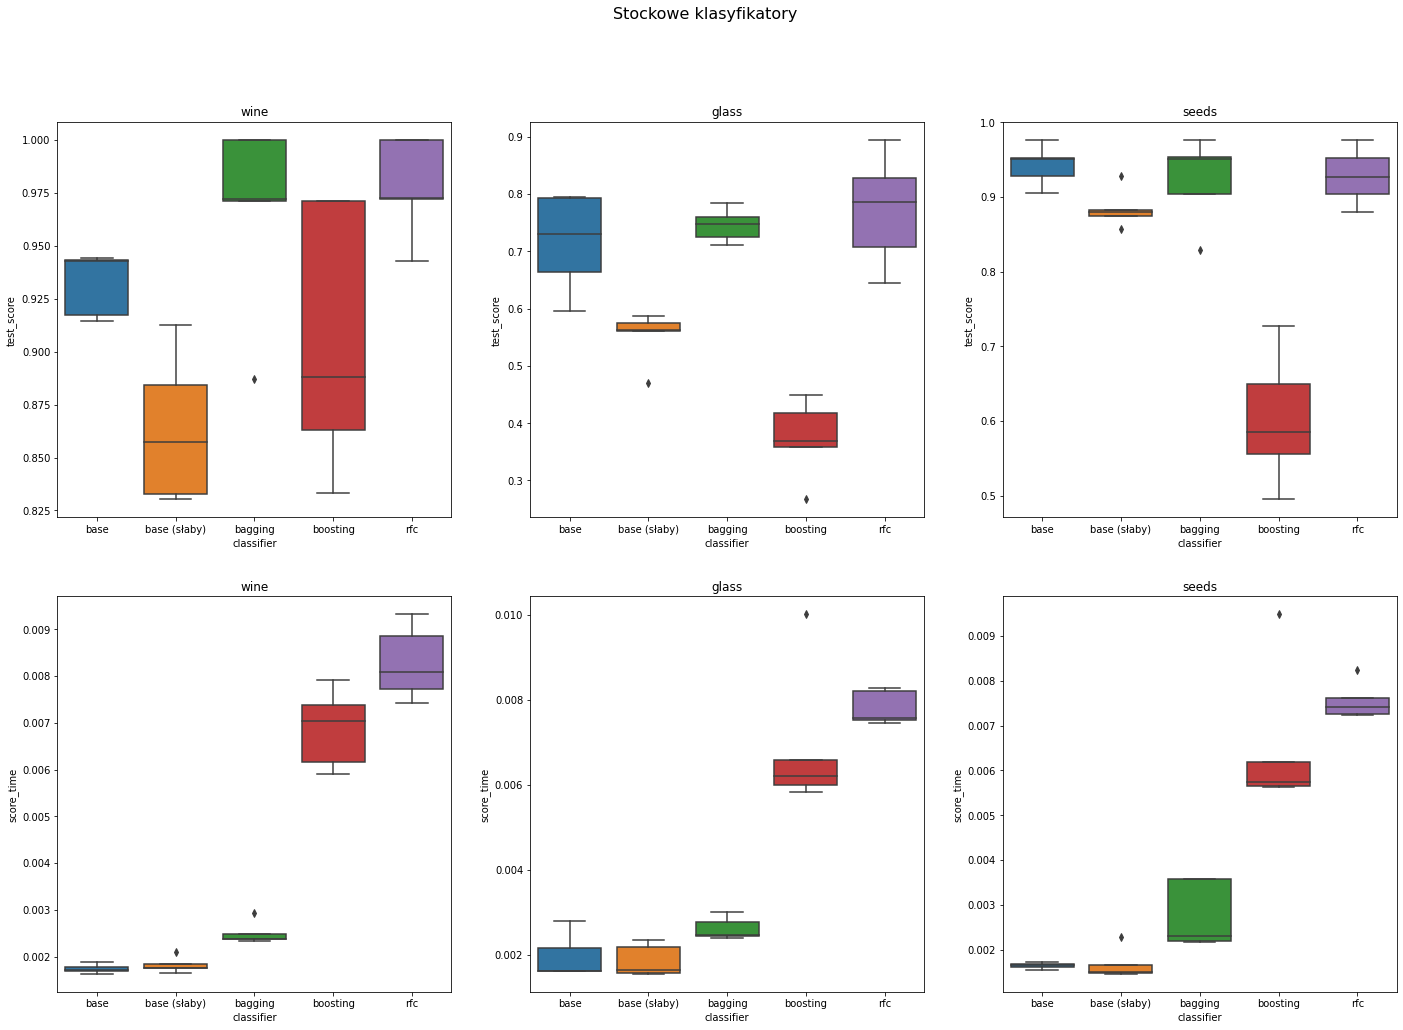

In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from src.base import get_classifier_scores, get_base_classifier, plot_scores
from src.datasets import load_glass, load_seeds, load_wine

wine_X, wine_y = load_wine()
glass_X, glass_y = load_glass()
seeds_X, seeds_y = load_seeds()

plot_scores(
    [
        get_classifier_scores(get_base_classifier(), X=wine_X, y=wine_y, classifier_name="base", dataset_name="wine"),
        get_classifier_scores(get_base_classifier(), X=glass_X, y=glass_y, classifier_name="base", dataset_name="glass"),
        get_classifier_scores(get_base_classifier(), X=seeds_X, y=seeds_y, classifier_name="base", dataset_name="seeds"),

        get_classifier_scores(DecisionTreeClassifier(max_depth=2), X=wine_X, y=wine_y, classifier_name="base (słaby)", dataset_name="wine"),
        get_classifier_scores(DecisionTreeClassifier(max_depth=2), X=glass_X, y=glass_y, classifier_name="base (słaby)", dataset_name="glass"),
        get_classifier_scores(DecisionTreeClassifier(max_depth=2), X=seeds_X, y=seeds_y, classifier_name="base (słaby)", dataset_name="seeds"),

        get_classifier_scores(BaggingClassifier(), X=wine_X, y=wine_y, classifier_name="bagging", dataset_name="wine"),
        get_classifier_scores(BaggingClassifier(), X=glass_X, y=glass_y, classifier_name="bagging", dataset_name="glass"),
        get_classifier_scores(BaggingClassifier(), X=seeds_X, y=seeds_y, classifier_name="bagging", dataset_name="seeds"),

        get_classifier_scores(AdaBoostClassifier(), X=wine_X, y=wine_y, classifier_name="boosting", dataset_name="wine"),
        get_classifier_scores(AdaBoostClassifier(), X=glass_X, y=glass_y, classifier_name="boosting", dataset_name="glass"),
        get_classifier_scores(AdaBoostClassifier(), X=seeds_X, y=seeds_y, classifier_name="boosting", dataset_name="seeds"),

        get_classifier_scores(RandomForestClassifier(), X=wine_X, y=wine_y, classifier_name="rfc", dataset_name="wine"),
        get_classifier_scores(RandomForestClassifier(), X=glass_X, y=glass_y, classifier_name="rfc", dataset_name="glass"),
        get_classifier_scores(RandomForestClassifier(), X=seeds_X, y=seeds_y, classifier_name="rfc", dataset_name="seeds"),
    ],
    x_key="classifier",
    suptitle="Stockowe klasyfikatory"
)

## Parametry baggingu

Ale najpiew szybki test ze słabą i i mocną bazą. Bagging ma cię lepiej z mocną bazą, więc taka będzie używana.

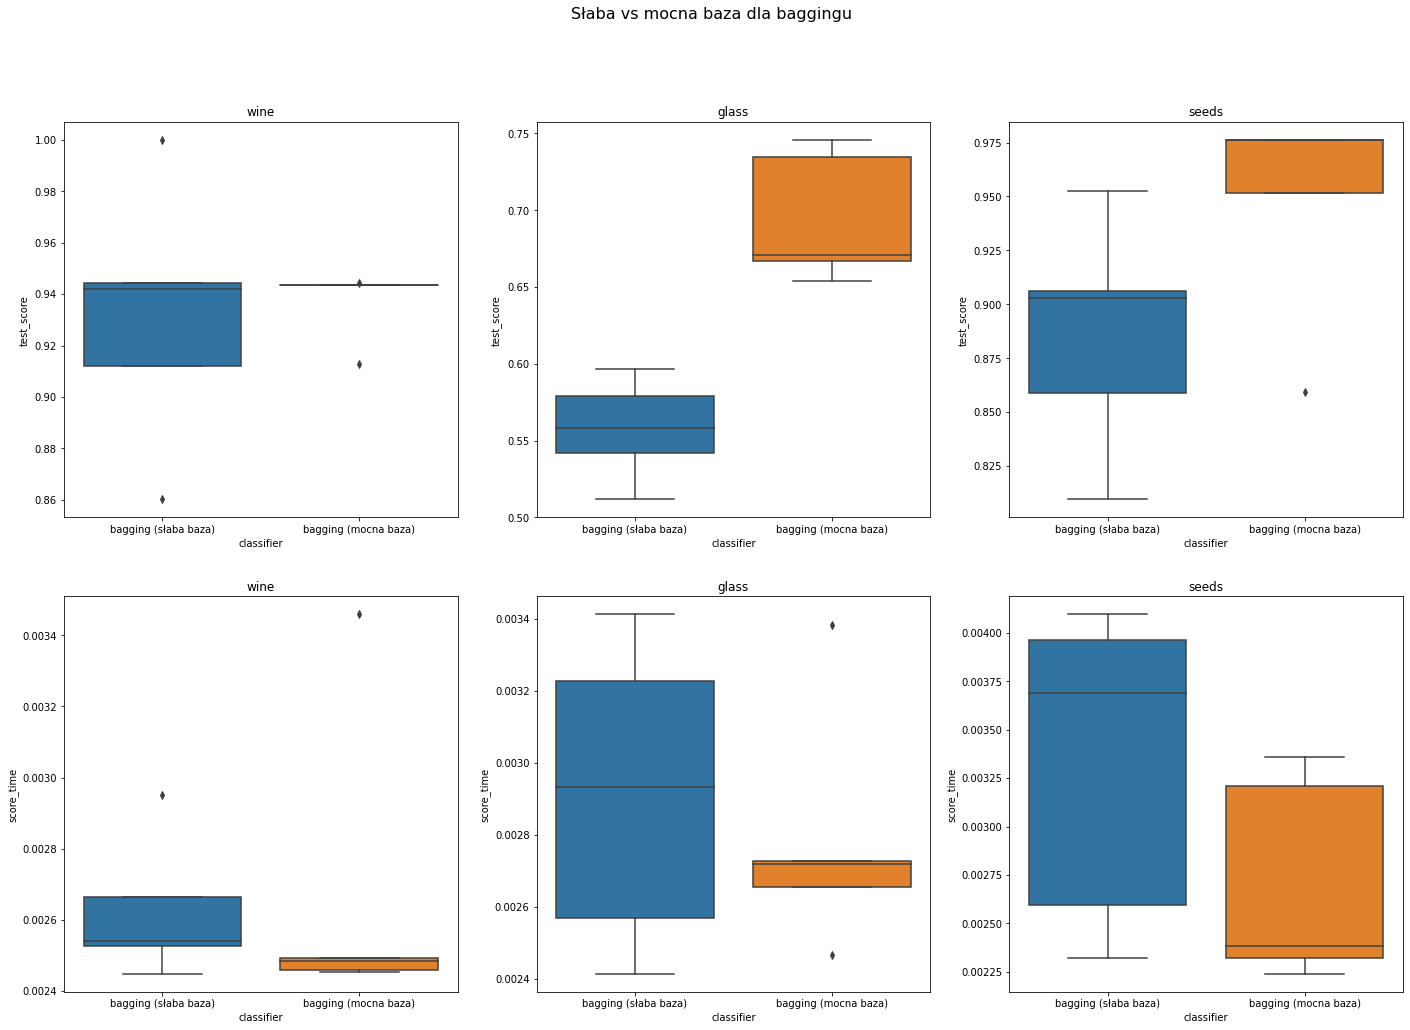

In [2]:
plot_scores(
    [
        get_classifier_scores(BaggingClassifier(DecisionTreeClassifier(max_depth=2)), X=wine_X, y=wine_y, classifier_name="bagging (słaba baza)", dataset_name="wine"),
        get_classifier_scores(BaggingClassifier(DecisionTreeClassifier(max_depth=2)), X=glass_X, y=glass_y, classifier_name="bagging (słaba baza)", dataset_name="glass"),
        get_classifier_scores(BaggingClassifier(DecisionTreeClassifier(max_depth=2)), X=seeds_X, y=seeds_y, classifier_name="bagging (słaba baza)", dataset_name="seeds"),

        get_classifier_scores(BaggingClassifier(DecisionTreeClassifier(max_depth=None)), X=wine_X, y=wine_y, classifier_name="bagging (mocna baza)", dataset_name="wine"),
        get_classifier_scores(BaggingClassifier(DecisionTreeClassifier(max_depth=None)), X=glass_X, y=glass_y, classifier_name="bagging (mocna baza)", dataset_name="glass"),
        get_classifier_scores(BaggingClassifier(DecisionTreeClassifier(max_depth=None)), X=seeds_X, y=seeds_y, classifier_name="bagging (mocna baza)", dataset_name="seeds"),
    ],
    x_key="classifier",
    suptitle="Słaba vs mocna baza dla baggingu"
)

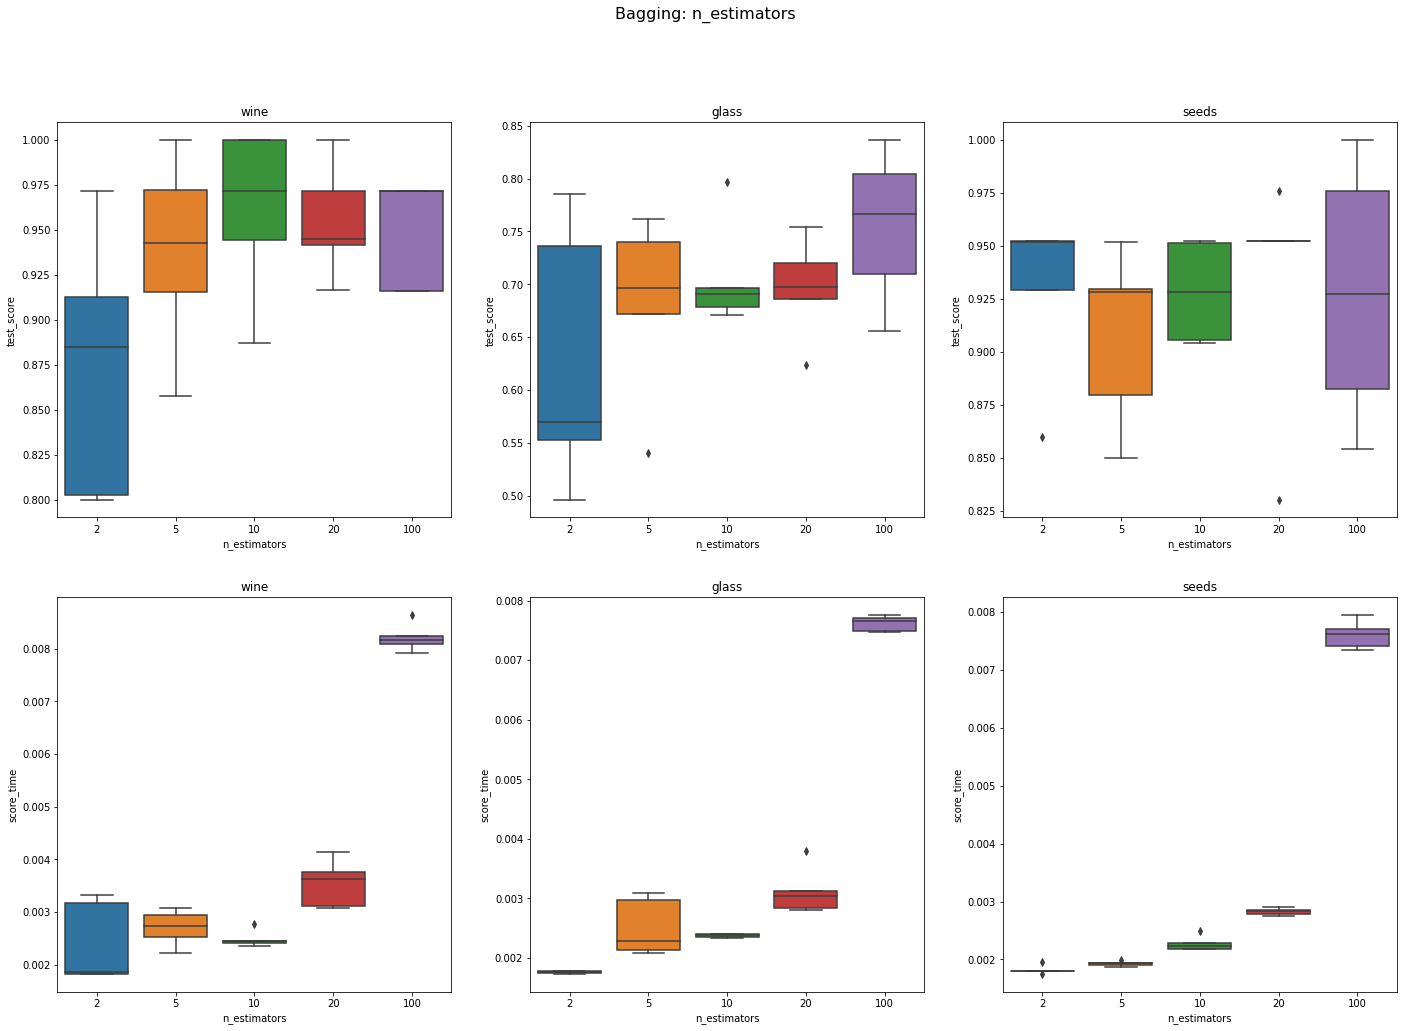

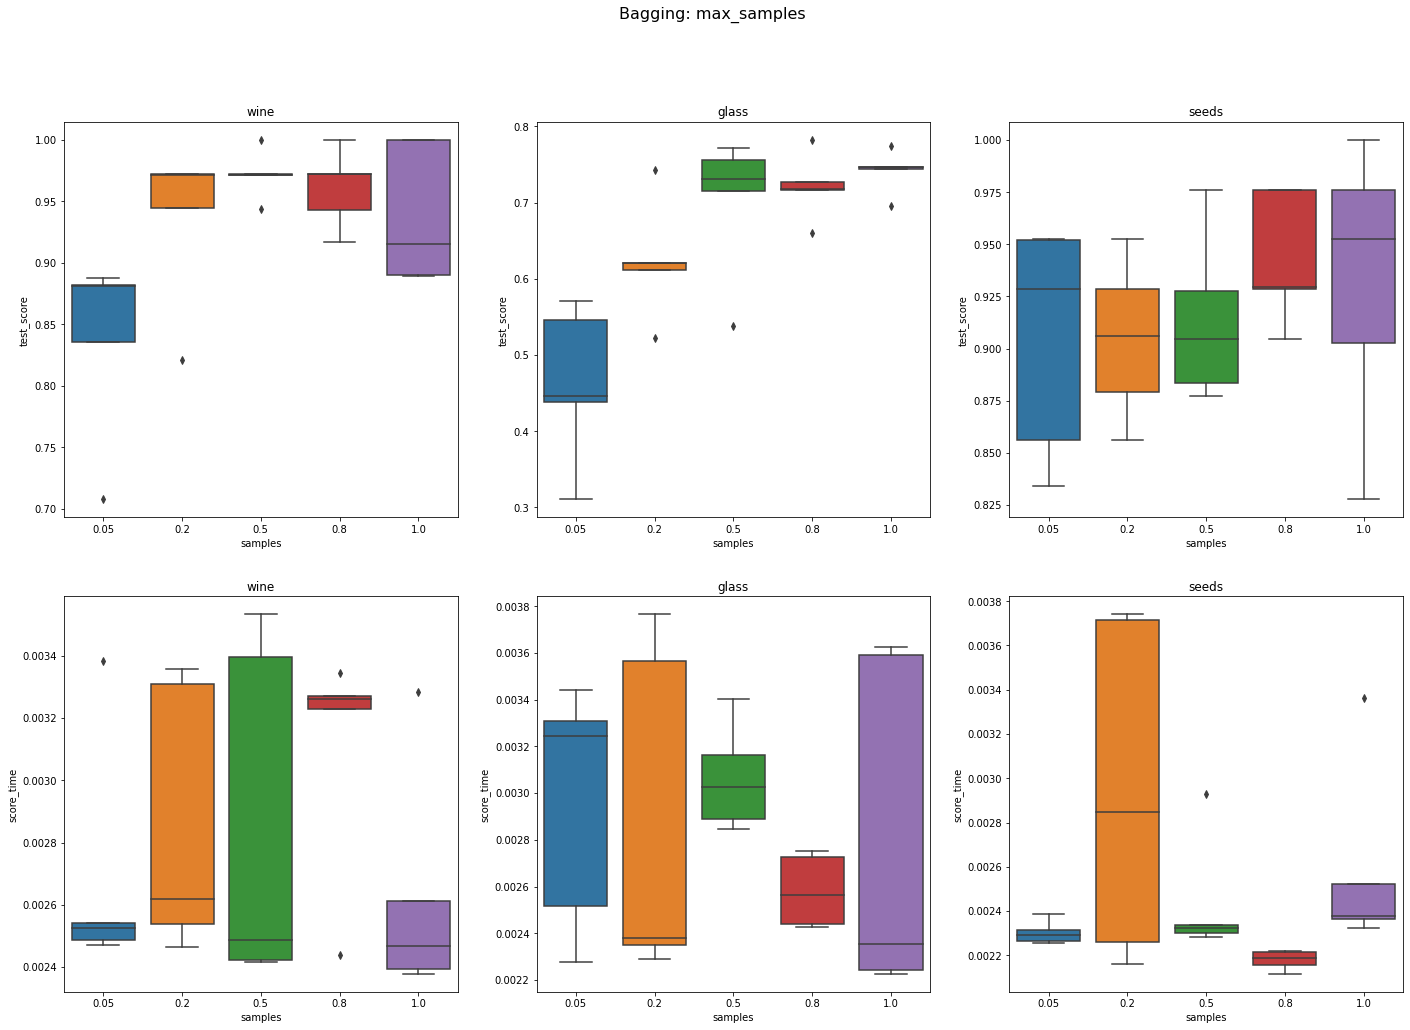

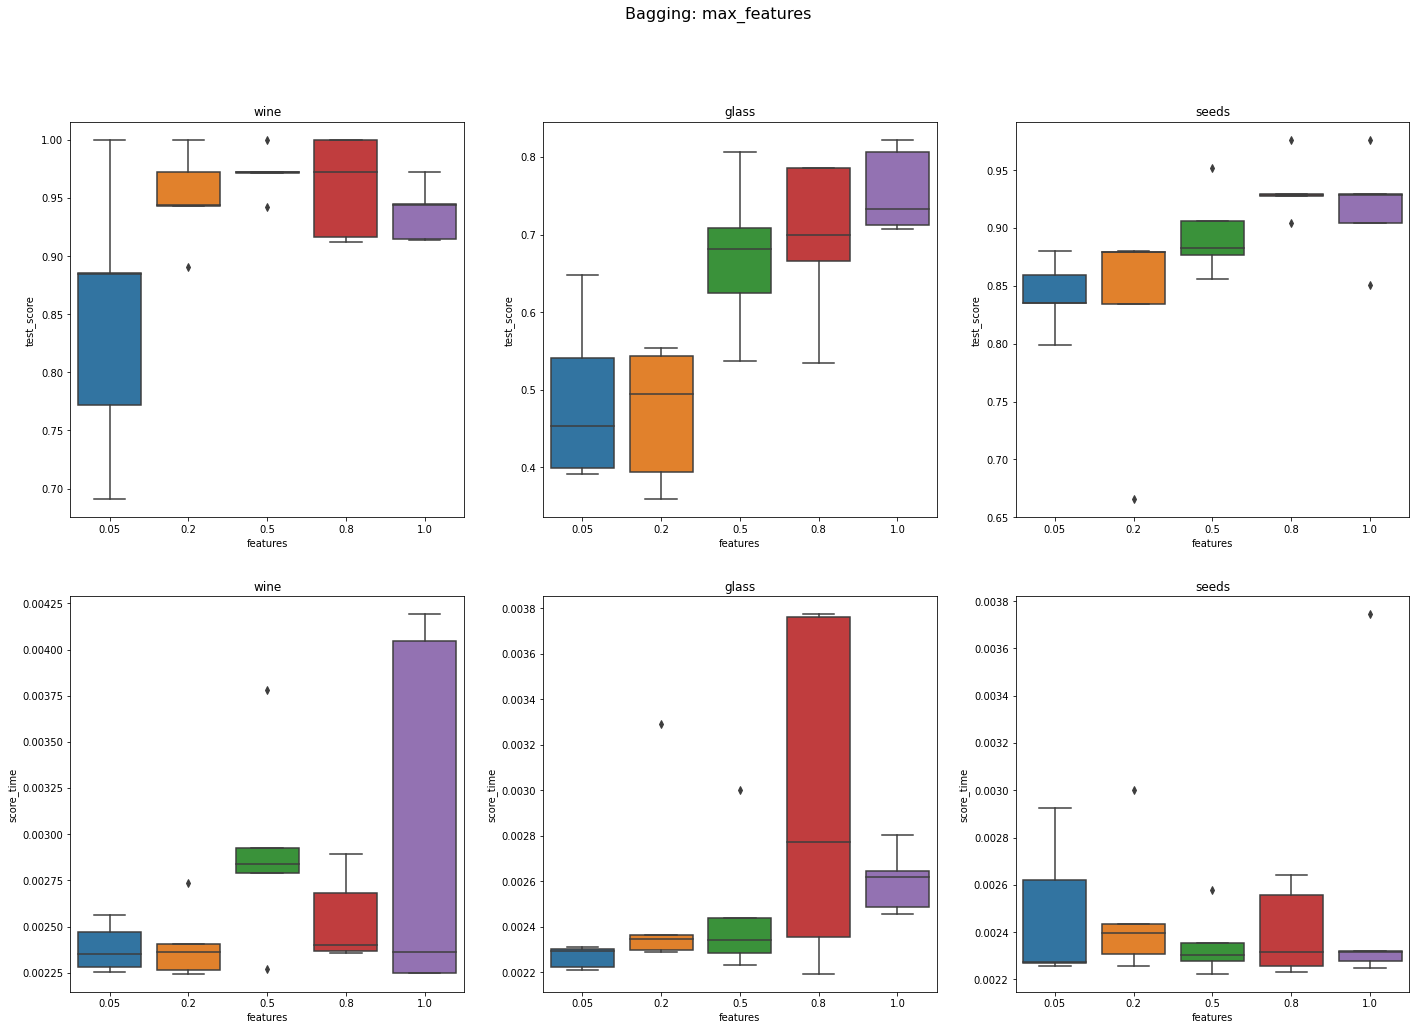

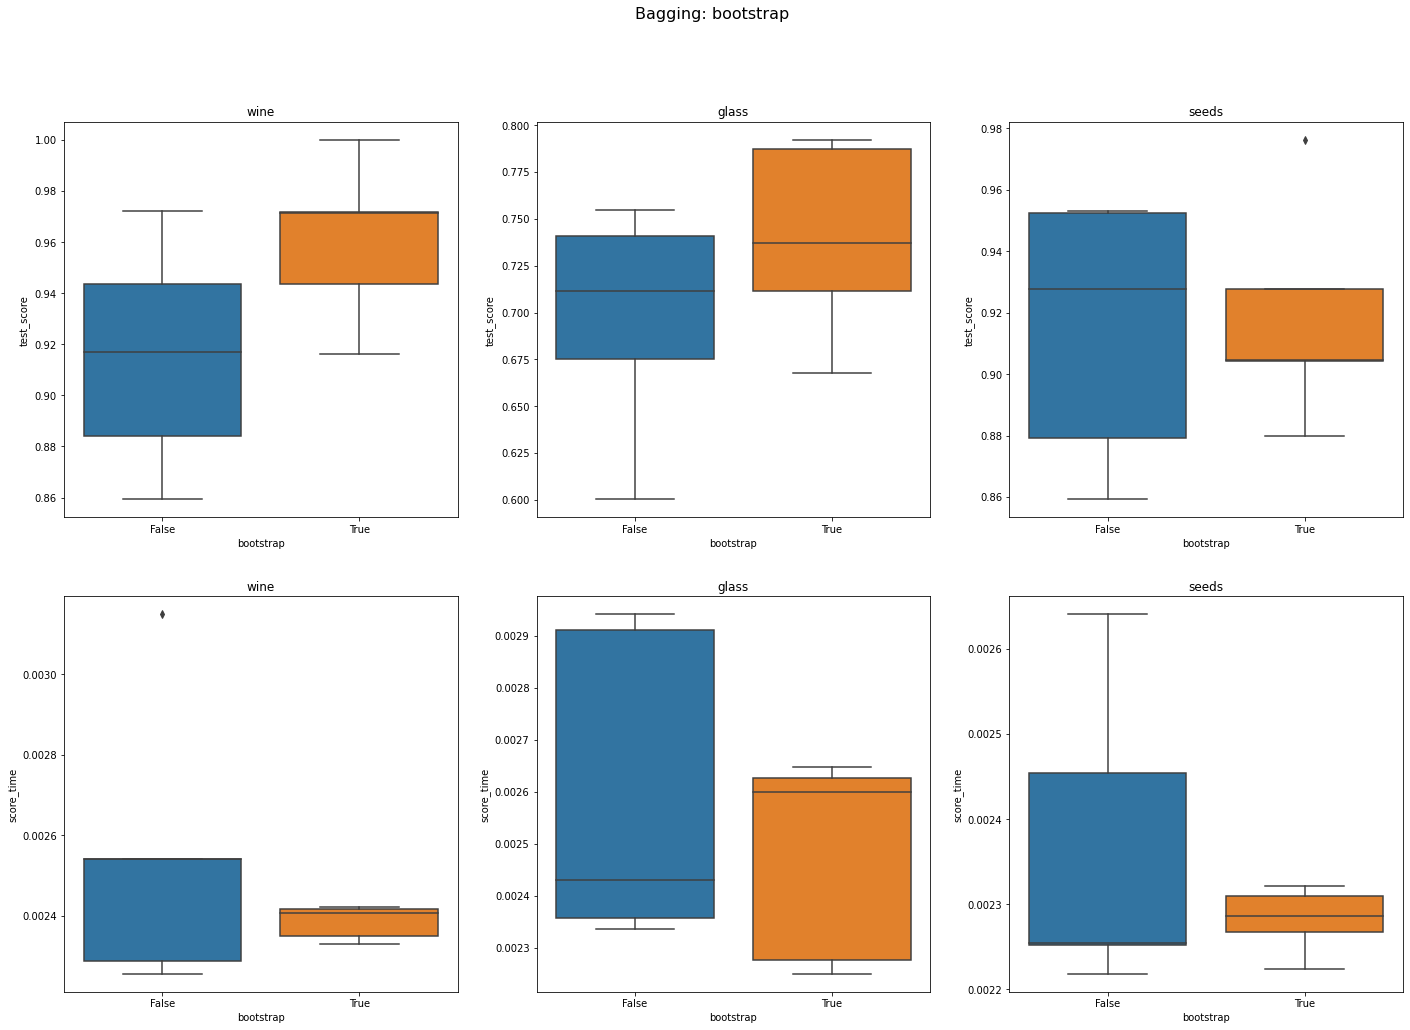

In [3]:
from src.bagging import get_bagging_n_estimators_df, get_bagging_n_samples_df, get_bagging_n_features_df, get_bagging_bootstrap_df

plot_scores(
    [
        get_bagging_n_estimators_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_bagging_n_estimators_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_bagging_n_estimators_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="n_estimators",
    suptitle="Bagging: n_estimators"
)

plot_scores(
    [
        get_bagging_n_samples_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_bagging_n_samples_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_bagging_n_samples_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="samples",
    suptitle="Bagging: max_samples"
)

plot_scores(
    [
        get_bagging_n_features_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_bagging_n_features_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_bagging_n_features_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="features",
    suptitle="Bagging: max_features"
)

plot_scores(
    [
        get_bagging_bootstrap_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_bagging_bootstrap_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_bagging_bootstrap_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="bootstrap",
    suptitle="Bagging: bootstrap"
)

## Parametry boostingu

Ale najpierw szybki test dla dobrego i gorszego bazowego estmatora

Okazuje się, że bazowy estymator mocno wpływa na boosting. Ogólnie gorszy base daje lepsze wyniki, więc będzie używany gorsza baza

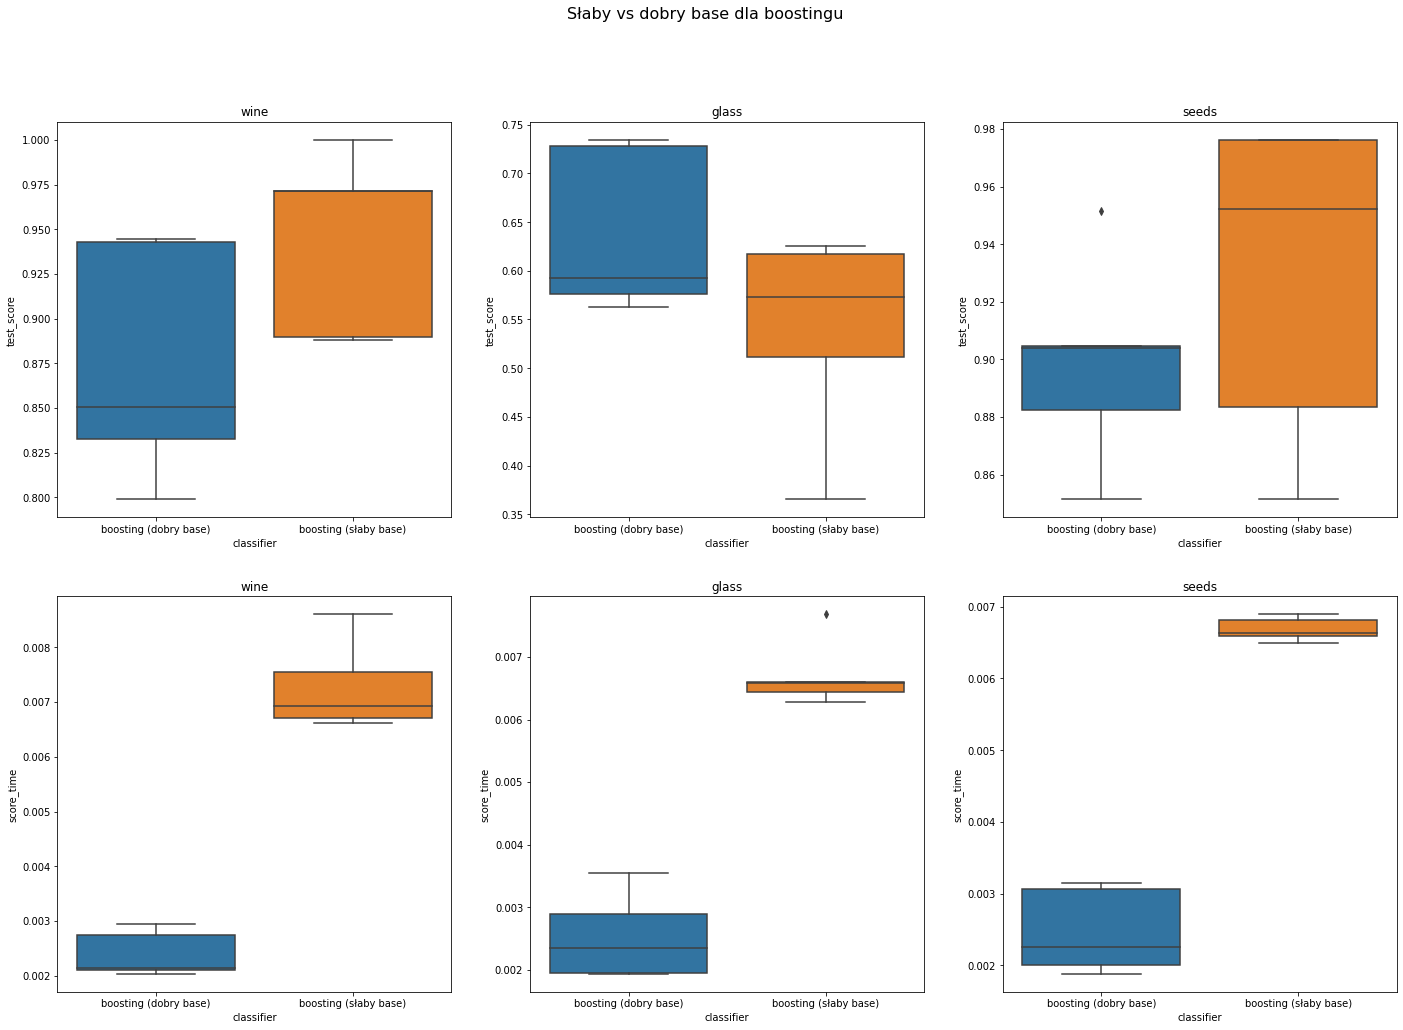

In [4]:
plot_scores(
    [
        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=None)), X=wine_X, y=wine_y, classifier_name="boosting (dobry base)", dataset_name="wine"),
        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=None)), X=glass_X, y=glass_y, classifier_name="boosting (dobry base)", dataset_name="glass"),
        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=None)), X=seeds_X, y=seeds_y, classifier_name="boosting (dobry base)", dataset_name="seeds"),

        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), X=wine_X, y=wine_y, classifier_name="boosting (słaby base)", dataset_name="wine"),
        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), X=glass_X, y=glass_y, classifier_name="boosting (słaby base)", dataset_name="glass"),
        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), X=seeds_X, y=seeds_y, classifier_name="boosting (słaby base)", dataset_name="seeds"),
    ],
    x_key="classifier",
    suptitle="Słaby vs dobry base dla boostingu"
)

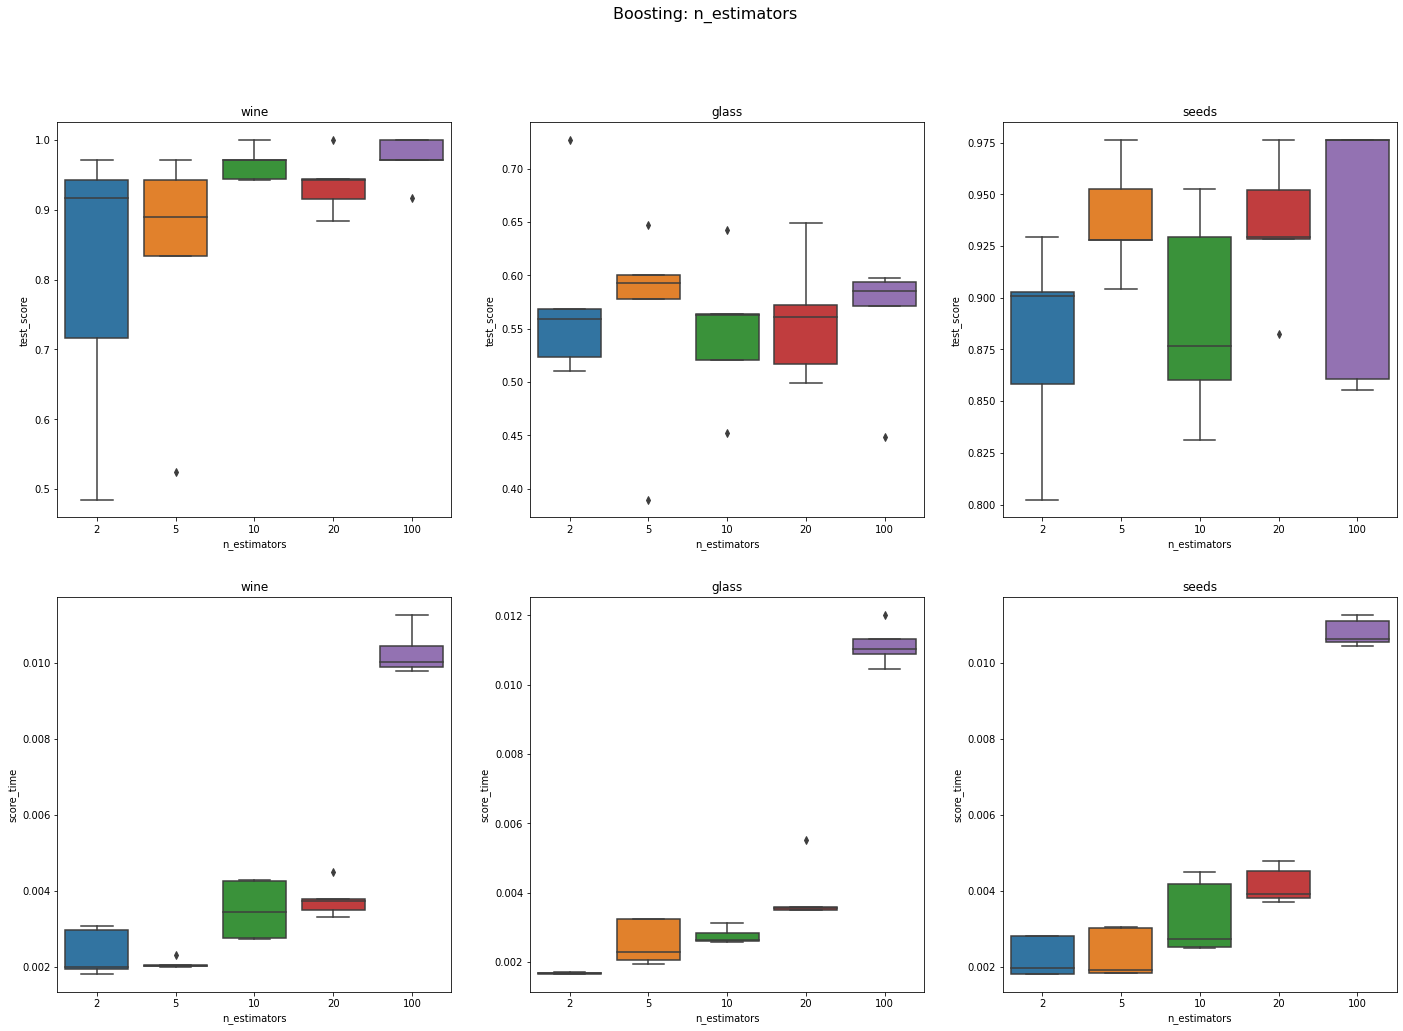

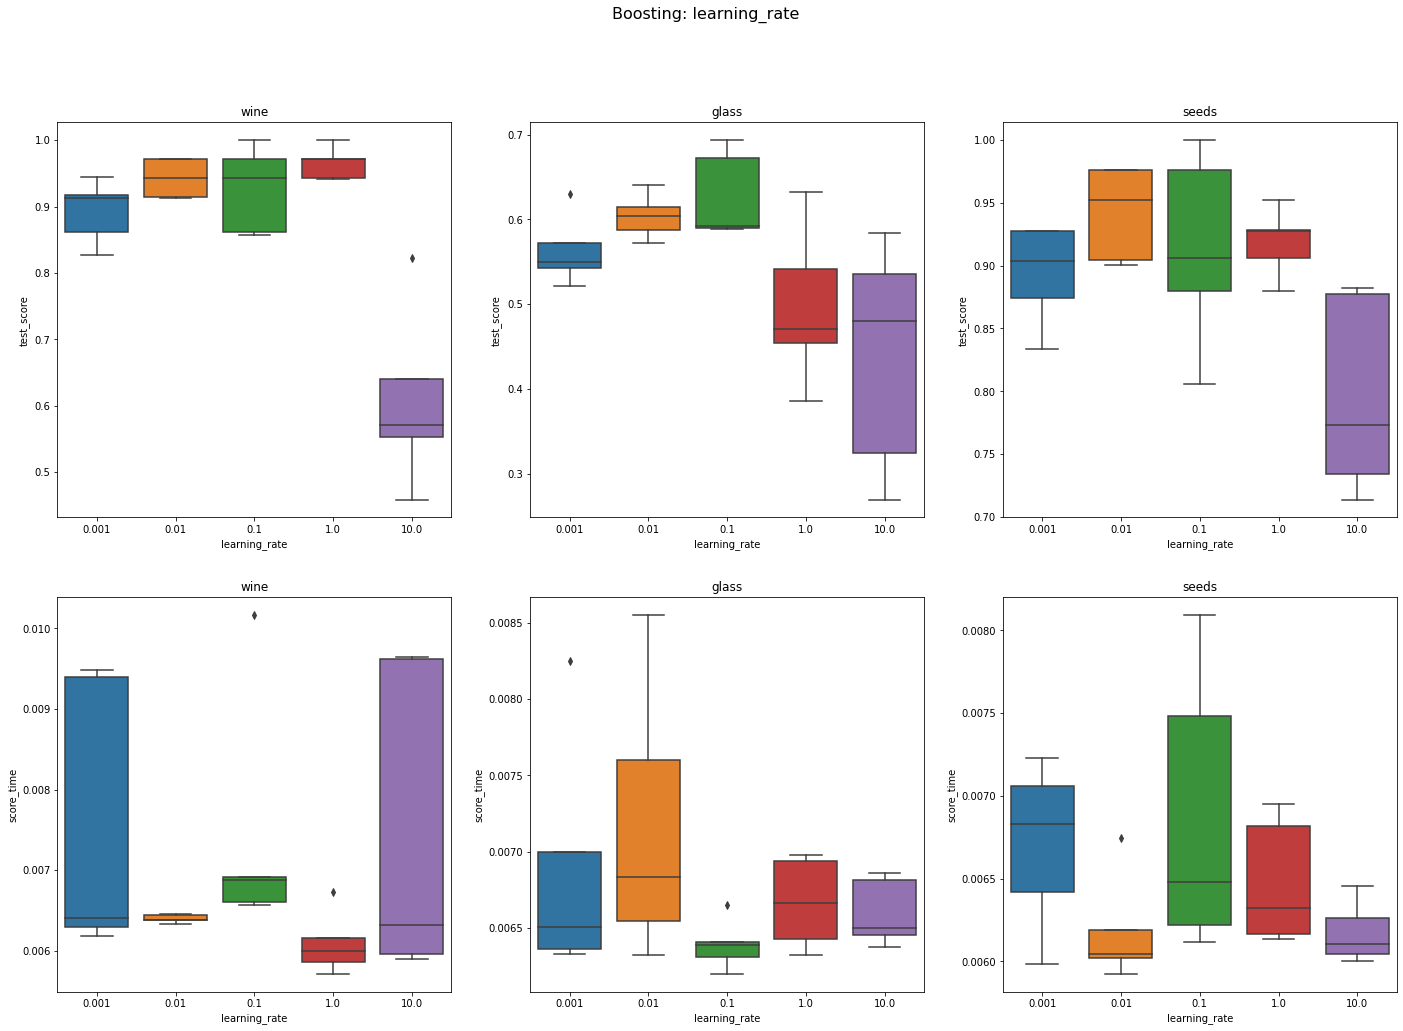

In [5]:
from src.boosting import get_boosting_n_estimators_df, get_boosting_lr_df

plot_scores(
    [
        get_boosting_n_estimators_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_boosting_n_estimators_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_boosting_n_estimators_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="n_estimators",
    suptitle="Boosting: n_estimators"
)

plot_scores(
    [
        get_boosting_lr_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_boosting_lr_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_boosting_lr_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="learning_rate",
    suptitle="Boosting: learning_rate"
)

## Parametry rfc

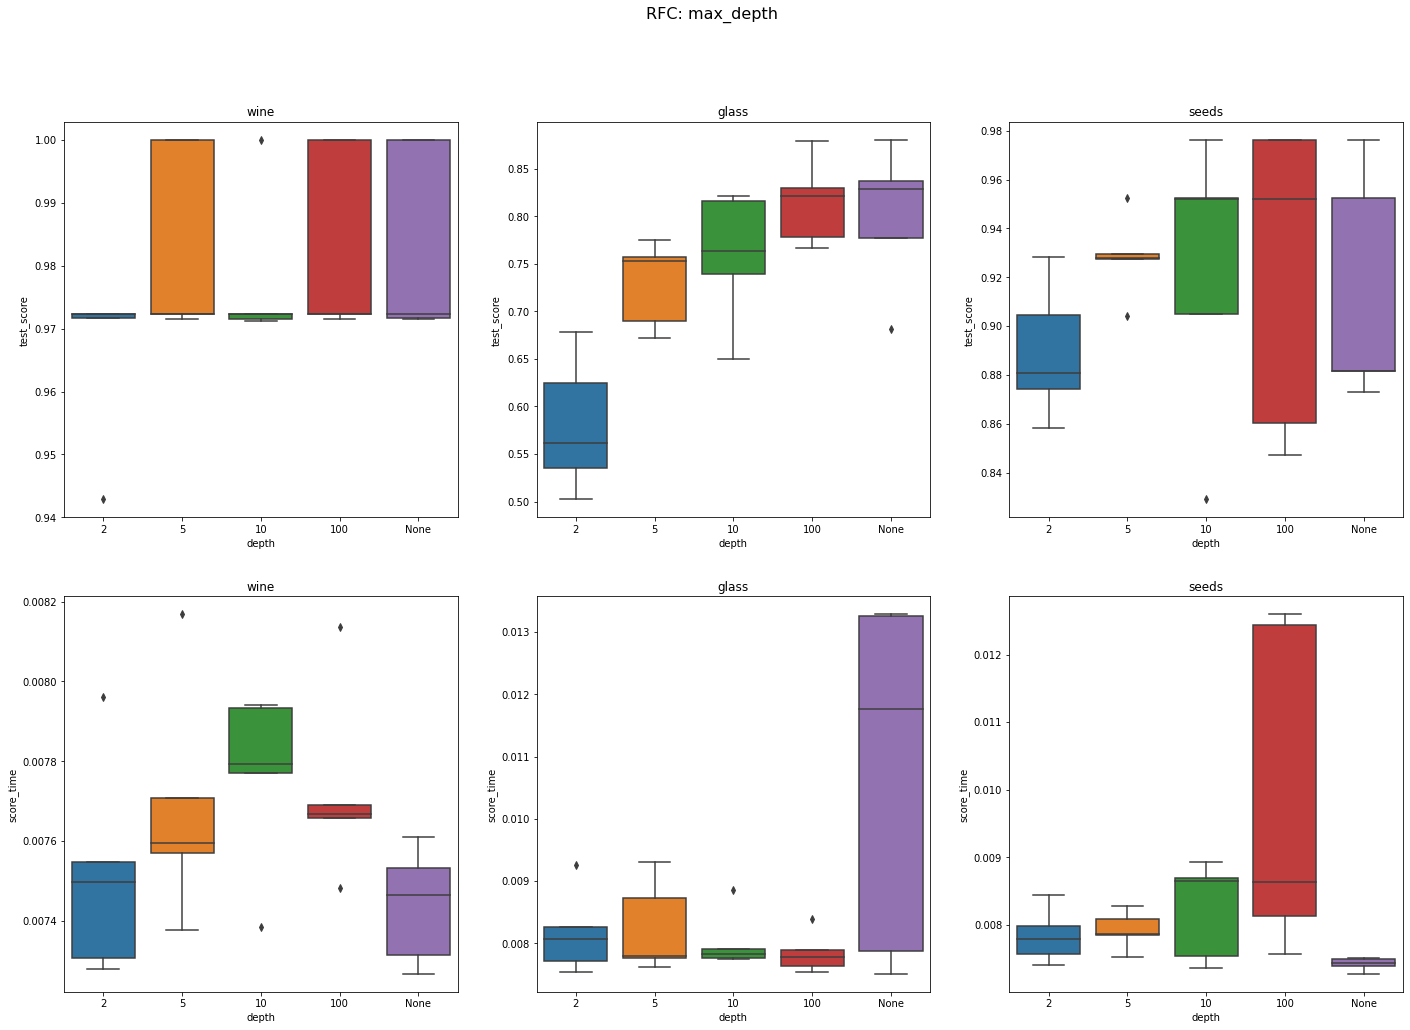

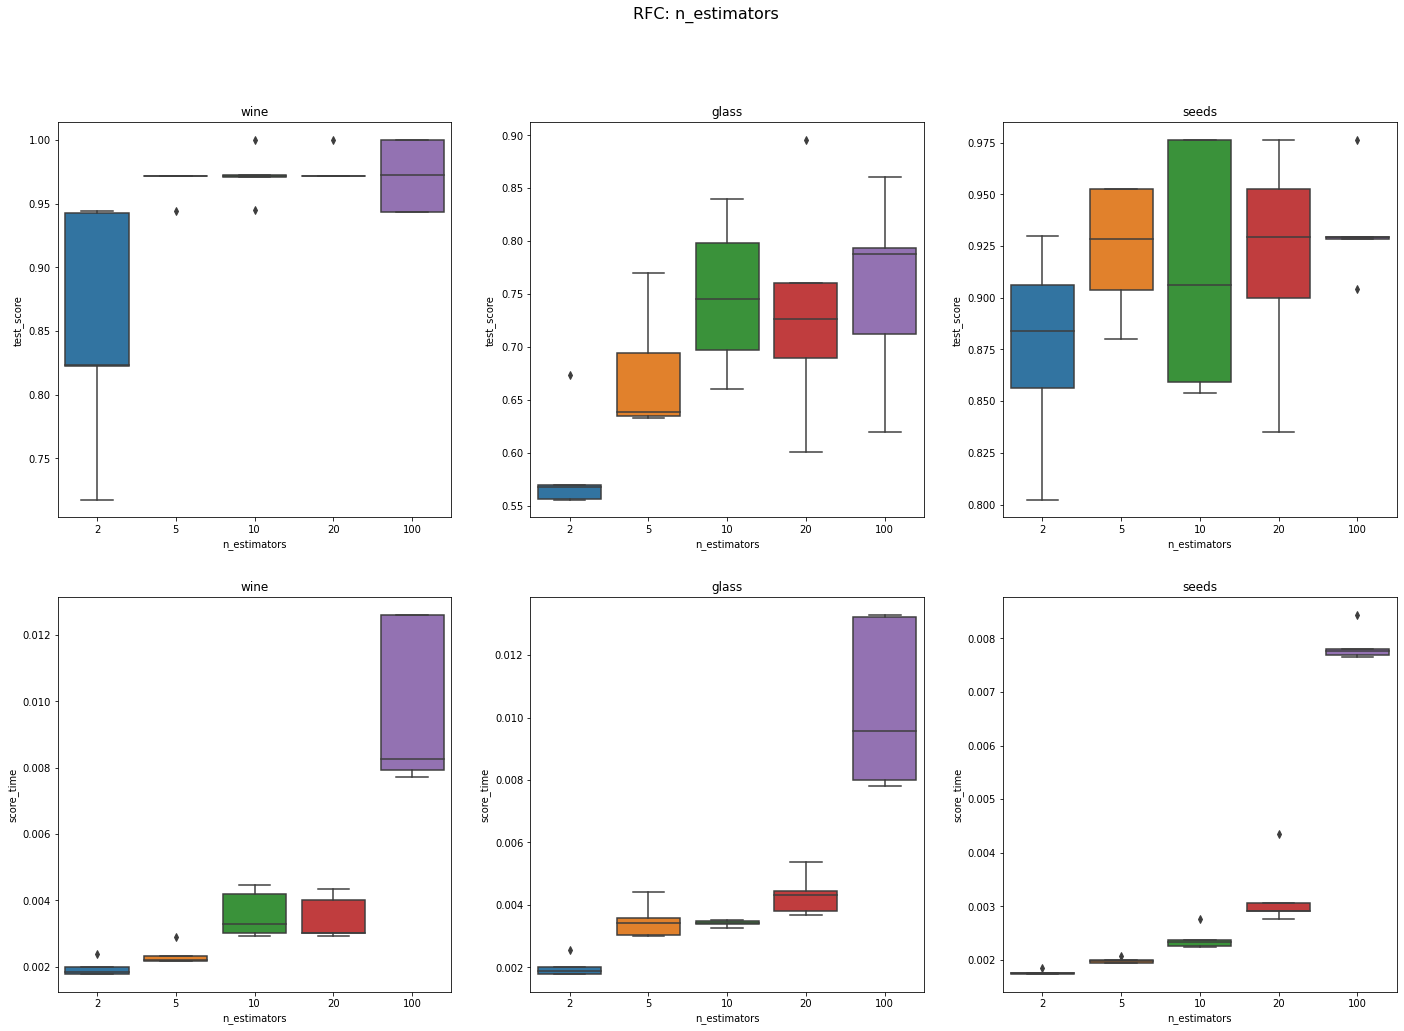

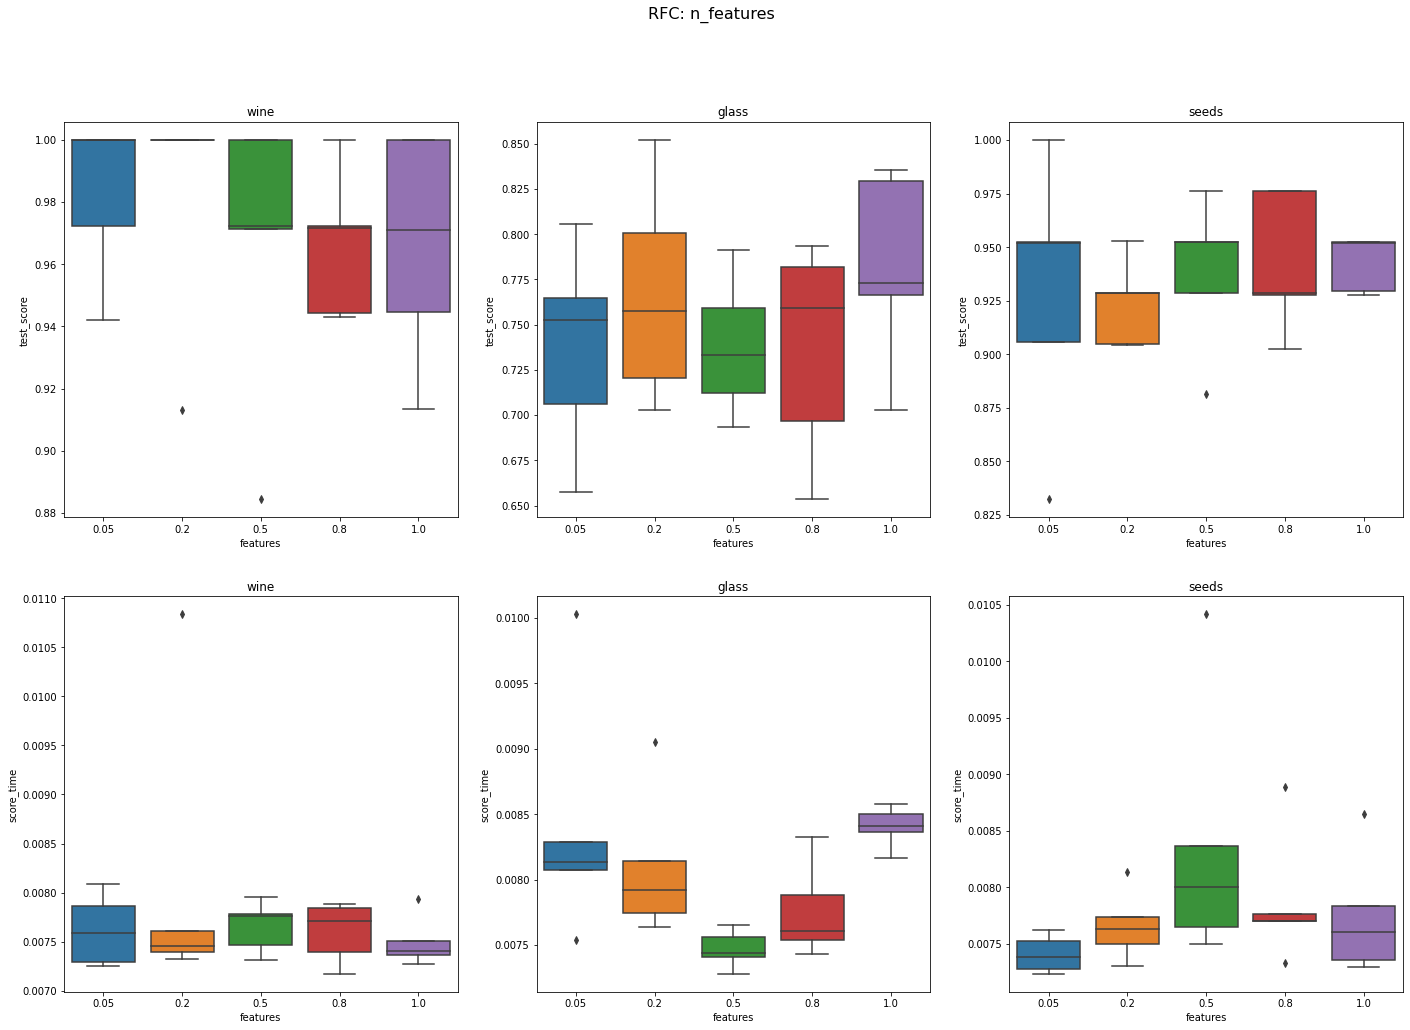

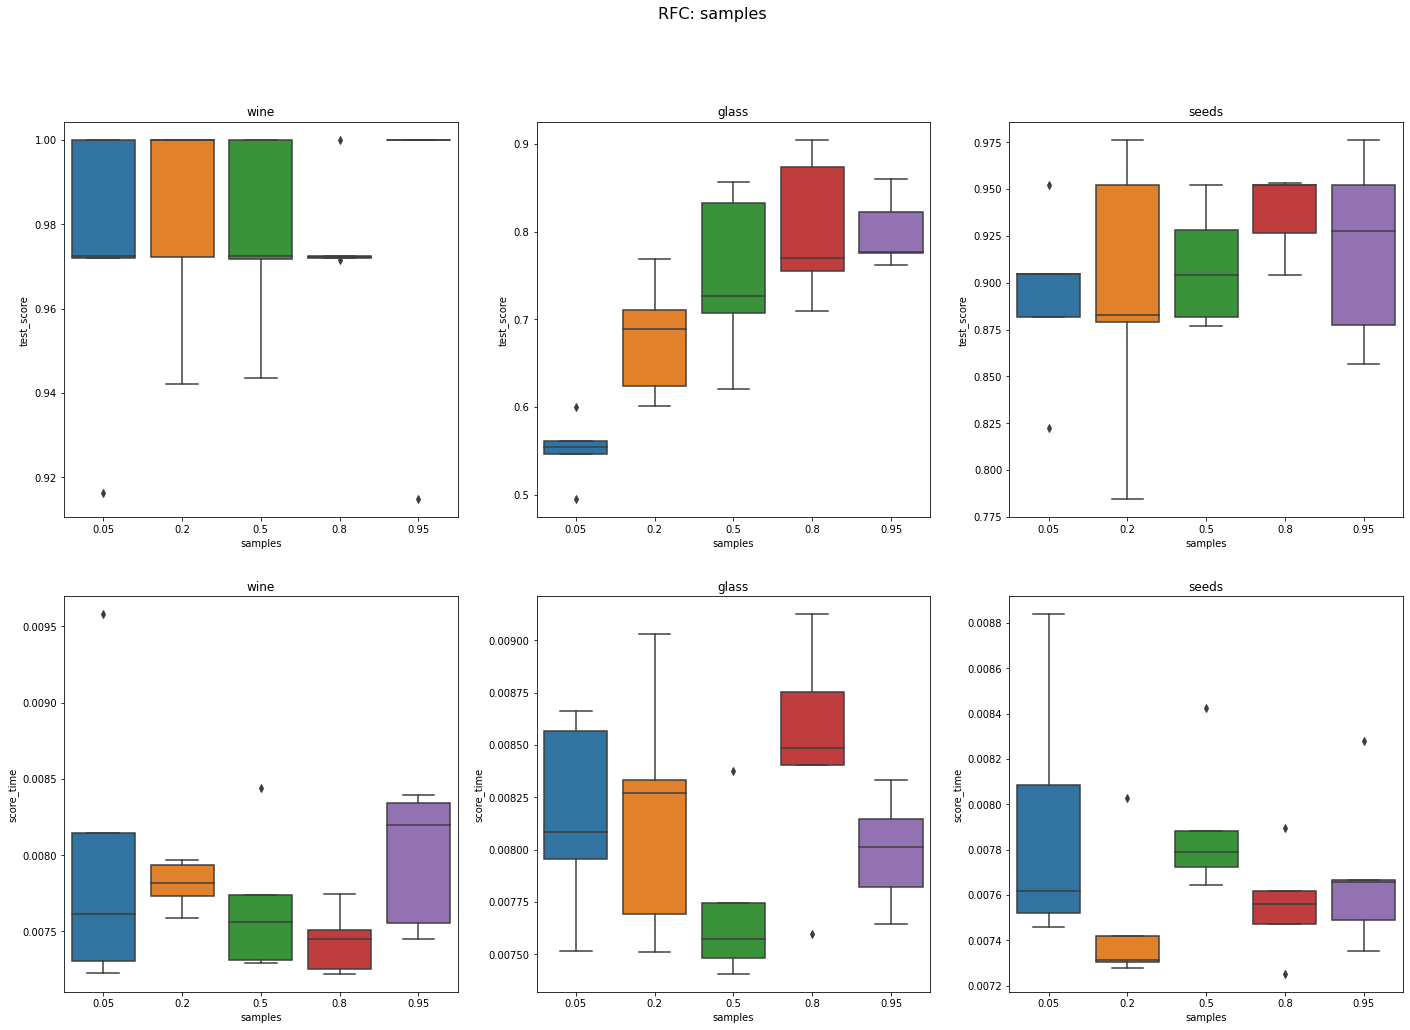

In [7]:
from src.rfc import get_rfc_depth_df, get_rfc_n_estimators_df, get_rfc_n_features_df, get_rfc_n_samples_df

plot_scores(
    [
        get_rfc_depth_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_rfc_depth_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_rfc_depth_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="depth",
    suptitle="RFC: max_depth"
)

plot_scores(
    [
        get_rfc_n_estimators_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_rfc_n_estimators_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_rfc_n_estimators_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="n_estimators",
    suptitle="RFC: n_estimators"
)

plot_scores(
    [
        get_rfc_n_features_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_rfc_n_features_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_rfc_n_features_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="features",
    suptitle="RFC: n_features"
)

plot_scores(
    [
        get_rfc_n_samples_df(X=wine_X, y=wine_y, dataset_name="wine"),
        get_rfc_n_samples_df(X=glass_X, y=glass_y, dataset_name="glass"),
        get_rfc_n_samples_df(X=seeds_X, y=seeds_y, dataset_name="seeds"),
    ],
    x_key="samples",
    suptitle="RFC: samples"
)

## Zestawienie metod dla najlepszych parametrów

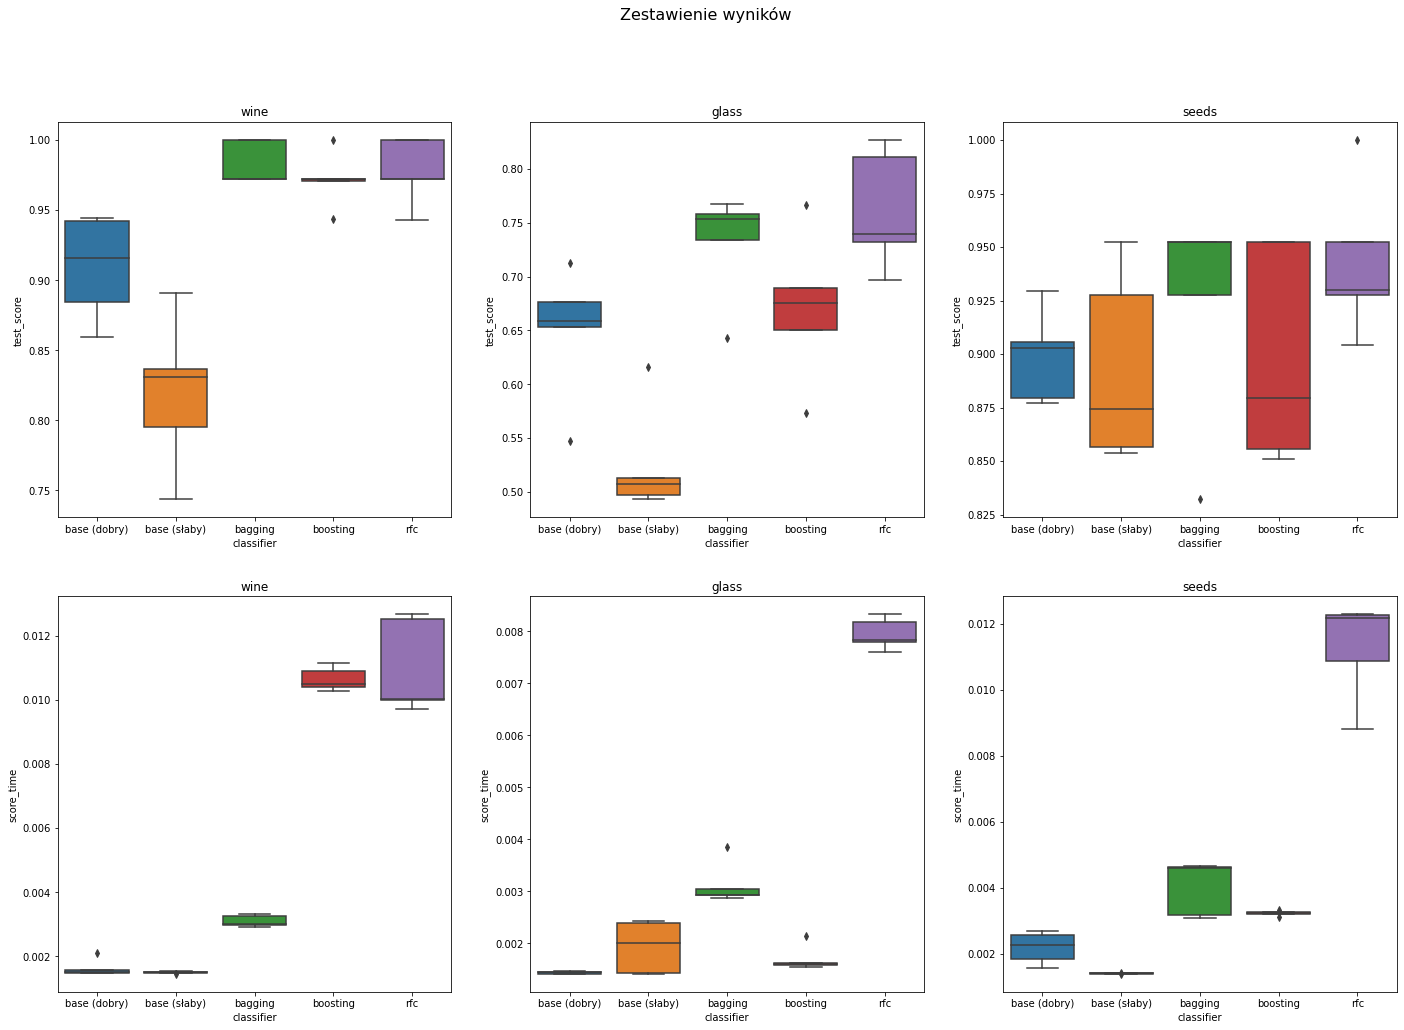

In [8]:
plot_scores(
    [
        get_classifier_scores(get_base_classifier(), X=wine_X, y=wine_y, classifier_name="base (dobry)", dataset_name="wine"),
        get_classifier_scores(get_base_classifier(), X=glass_X, y=glass_y, classifier_name="base (dobry)", dataset_name="glass"),
        get_classifier_scores(get_base_classifier(), X=seeds_X, y=seeds_y, classifier_name="base (dobry)", dataset_name="seeds"),

        get_classifier_scores(DecisionTreeClassifier(max_depth=2), X=wine_X, y=wine_y, classifier_name="base (słaby)", dataset_name="wine"),
        get_classifier_scores(DecisionTreeClassifier(max_depth=2), X=glass_X, y=glass_y, classifier_name="base (słaby)", dataset_name="glass"),
        get_classifier_scores(DecisionTreeClassifier(max_depth=2), X=seeds_X, y=seeds_y, classifier_name="base (słaby)", dataset_name="seeds"),

        get_classifier_scores(BaggingClassifier(n_estimators=20, max_samples=0.5, max_features=0.8, bootstrap=True), X=wine_X, y=wine_y, classifier_name="bagging", dataset_name="wine"),
        get_classifier_scores(BaggingClassifier(n_estimators=20, max_samples=0.8, max_features=0.8, bootstrap=True), X=glass_X, y=glass_y, classifier_name="bagging", dataset_name="glass"),
        get_classifier_scores(BaggingClassifier(n_estimators=20, max_samples=0.8, max_features=0.8, bootstrap=True), X=seeds_X, y=seeds_y, classifier_name="bagging", dataset_name="seeds"),

        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, learning_rate=0.5), X=wine_X, y=wine_y, classifier_name="boosting", dataset_name="wine"),
        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100, learning_rate=0.001), X=glass_X, y=glass_y, classifier_name="boosting", dataset_name="glass"),
        get_classifier_scores(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=20, learning_rate=0.001), X=seeds_X, y=seeds_y, classifier_name="boosting", dataset_name="seeds"),

        get_classifier_scores(RandomForestClassifier(max_depth=100, max_features=0.5, n_estimators=100, max_samples=0.8), X=wine_X, y=wine_y, classifier_name="rfc", dataset_name="wine"),
        get_classifier_scores(RandomForestClassifier(max_depth=10, max_features=0.8, n_estimators=100, max_samples=0.5), X=glass_X, y=glass_y, classifier_name="rfc", dataset_name="glass"),
        get_classifier_scores(RandomForestClassifier(max_depth=None, max_features=1.0, n_estimators=100, max_samples=0.8), X=seeds_X, y=seeds_y, classifier_name="rfc", dataset_name="seeds"),
    ],
    x_key="classifier",
    suptitle="Zestawienie wyników"
)